In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch

import constant
from constant import org_cols, wsr_cols, geo_cols, semigeo_cols
import myplot
from models import model_evaluation, model_improvement
path = "SH_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path
error_path = constant.error_path + path


In [2]:
%load_ext autoreload

# Evaluation

## load evaluation data, models, features

In [3]:
df_evl = pd.read_parquet(constant.SH_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [4]:
model_original = torch.load(model_path + "original_model.pth")
model_wsr = torch.load(model_path + "wsr_model.pth")
model_geo = torch.load(model_path + "geo_model.pth")
model_semigeo = torch.load(model_path + "semigeo_model.pth")

## 1d, 24hours

In [5]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-02")
df_evl_1d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [6]:
original_err = model_evaluation(df_evl_1d, org_cols, model_original, path=error_path+"original_error_1d.csv")
wsr_err = model_evaluation(df_evl_1d, wsr_cols, model_wsr, path=error_path+"wsr_error_1d.csv")
geo_err = model_evaluation(df_evl_1d, geo_cols, model_geo, path=error_path+"geo_error_1d.csv")
semigeo_err = model_evaluation(df_evl_1d, semigeo_cols, model_semigeo, path=error_path+"semigeo_error_1d.csv")

#### Model Comparement

In [7]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -72.06, 'Windshear': -0.413, 'Geo': 0.084, 'Semigeo': -0.098}

In [8]:
print(original_err.iloc[-1]["NRMSE_CUM"])
print(wsr_err.iloc[-1]["NRMSE_CUM"])
print(geo_err.iloc[-1]["NRMSE_CUM"])
print(semigeo_err.iloc[-1]["NRMSE_CUM"])

79.09292199736964
10.629686062814667
8.068765419893456
8.302593989496032


### Plot Normalized Error

In [9]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "Windshear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "Semigeo" : semigeo_err["NMAE"]}, ylabel="NMAE (MW)", path=plot_path+"Model_compare_NMAE_1d.png")

In [10]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "Windshear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "Semigeo" : semigeo_err["NMSE"]}, ylabel="NMSE (MW)", path=plot_path+"Model_compare_NMSE_1d.png")

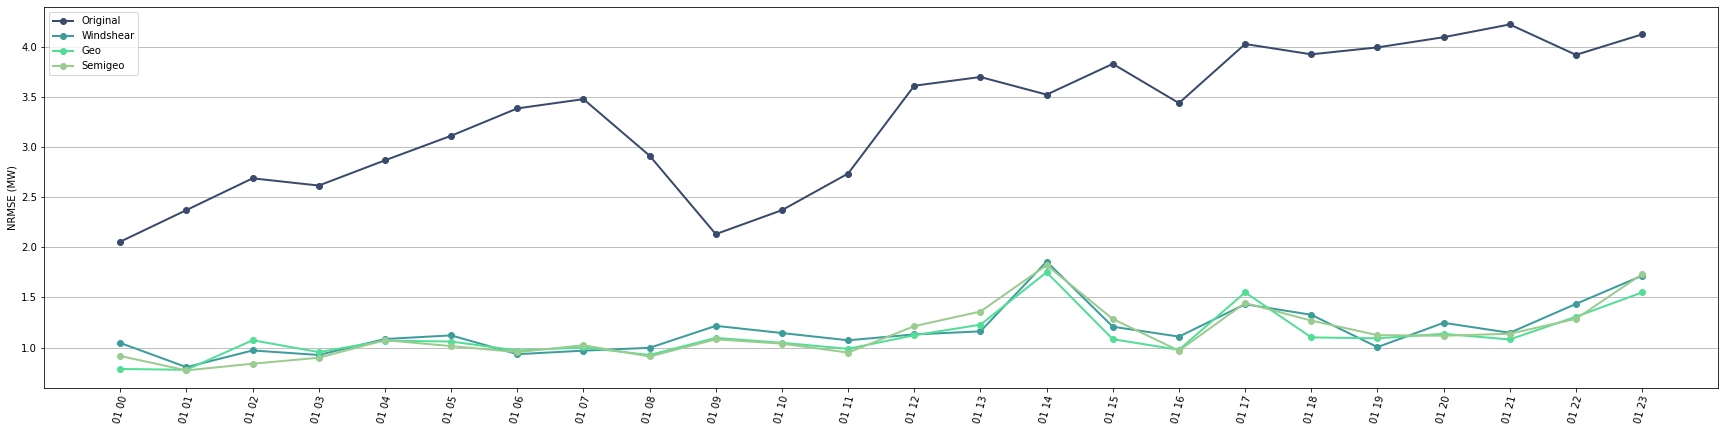

In [11]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_IDV"], "Windshear" : wsr_err["NRMSE_IDV"], "Geo" : geo_err["NRMSE_IDV"], "Semigeo" : semigeo_err["NRMSE_IDV"]}, ylabel="NRMSE (MW)", path=plot_path+"Model_compare_NRMSE_1d.png")

### Plot Cumulated Normalized Error

In [12]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_CUM"], "Windshear" : wsr_err["NMAE_CUM"], "Geo" : geo_err["NMAE_CUM"], "Semigeo" : semigeo_err["NMAE_CUM"]}, ylabel="Cumulated NMAE (MW)", path=plot_path+"Model_compare_CNMAE_1d.png")

In [13]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_CUM"], "Windshear" : wsr_err["NMSE_CUM"], "Geo" : geo_err["NMSE_CUM"], "Semigeo" : semigeo_err["NMSE_CUM"]}, ylabel="Cumulated NMSE (MW)", path=plot_path+"Model_compare_CNMSE_1d.png")

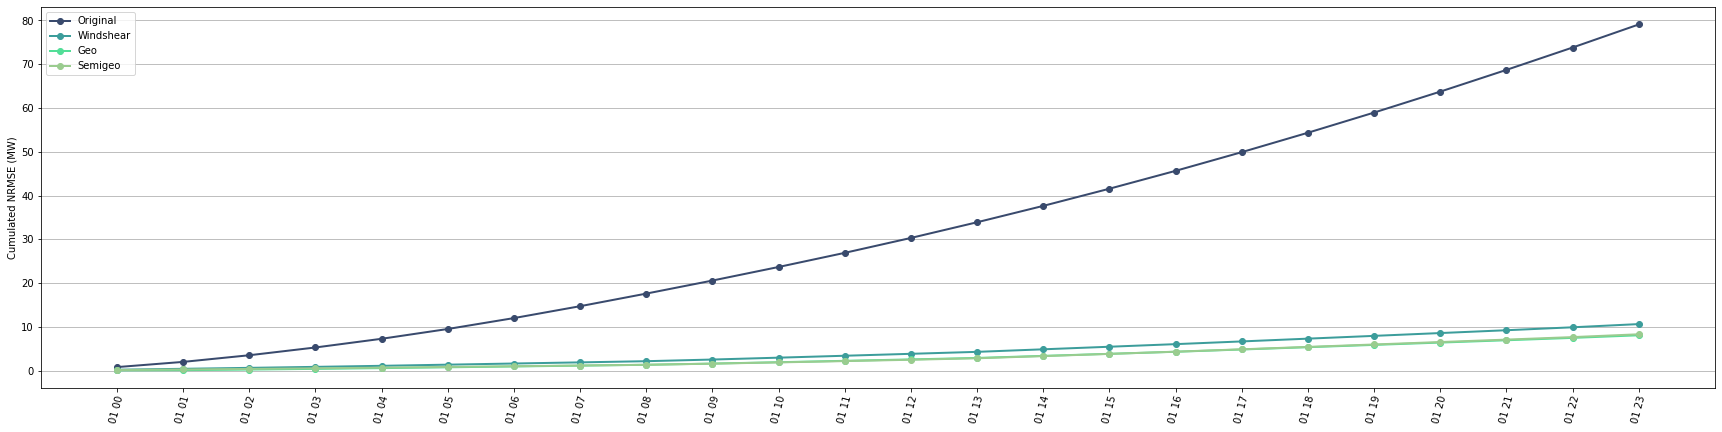

In [14]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_CUM"], "Windshear" : wsr_err["NRMSE_CUM"], "Geo" : geo_err["NRMSE_CUM"], "Semigeo" : semigeo_err["NRMSE_CUM"]}, ylabel="Cumulated NRMSE (MW)", path=plot_path+"Model_compare_CNRMSE_1d.png")

### Plot Prediction

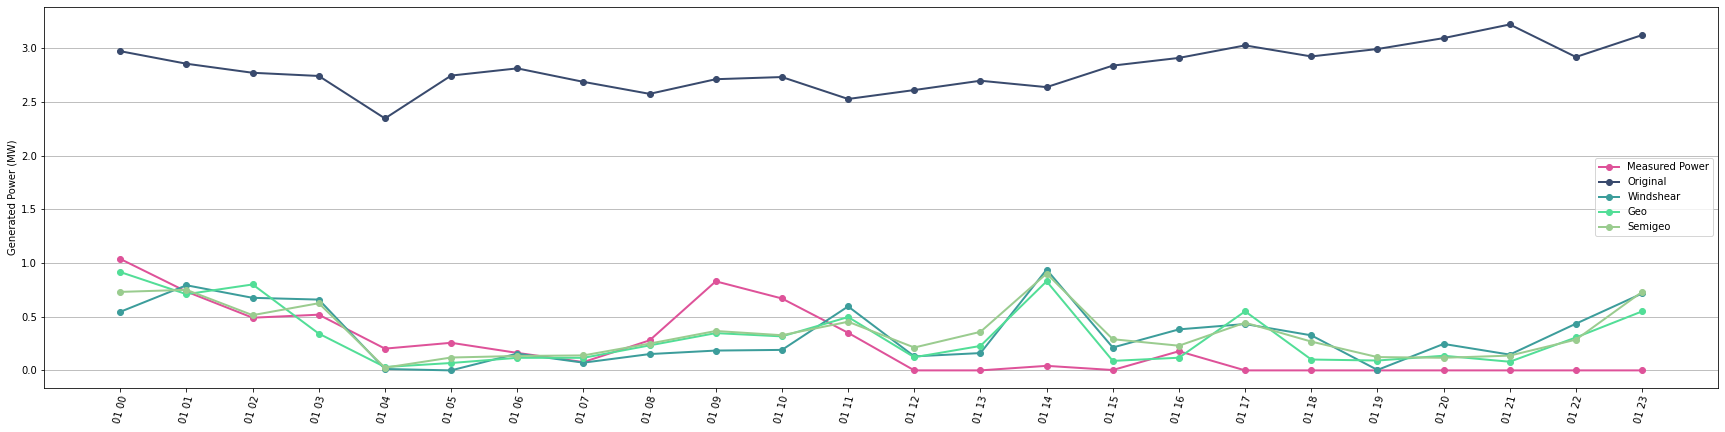

In [15]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)", path=plot_path+"Model_predict_1d.png")

## 2ds, 48hours

In [16]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-03")
df_evl_2d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [17]:
original_err = model_evaluation(df_evl_2d, org_cols, model_original, path=error_path+"original_error_2d.csv")
wsr_err = model_evaluation(df_evl_2d, wsr_cols, model_wsr, path=error_path+"wsr_error_2d.csv")
geo_err = model_evaluation(df_evl_2d, geo_cols, model_geo, path=error_path+"geo_error_2d.csv")
semigeo_err = model_evaluation(df_evl_2d, semigeo_cols, model_semigeo, path=error_path+"semigeo_error_2d.csv")

#### Model Comparement

In [18]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -2.518, 'Windshear': 0.874, 'Geo': 0.902, 'Semigeo': 0.883}

### Plot Normalized Error

In [19]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "Windshear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "Semigeo" : semigeo_err["NMAE"]}, ylabel="NMAE (MW)", path=plot_path+"Model_compare_NMAE_2d.png")

In [20]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "Windshear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "Semigeo" : semigeo_err["NMSE"]}, ylabel="NMSE (MW)", path=plot_path+"Model_compare_NMSE_2d.png")

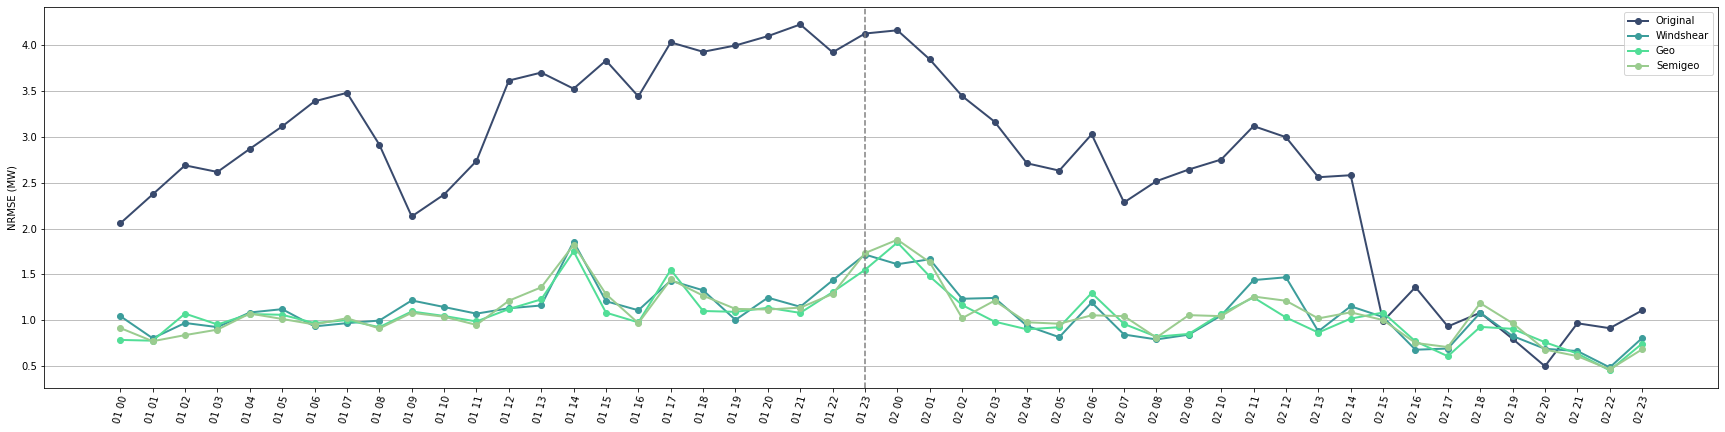

In [21]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_IDV"], "Windshear" : wsr_err["NRMSE_IDV"], "Geo" : geo_err["NRMSE_IDV"], "Semigeo" : semigeo_err["NRMSE_IDV"]}, ylabel="NRMSE (MW)", path=plot_path+"Model_compare_RNMSE_2d.png")

### Plot Cumulated Normalized Error

In [22]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_CUM"], "Windshear" : wsr_err["NMAE_CUM"], "Geo" : geo_err["NMAE_CUM"], "Semigeo" : semigeo_err["NMAE_CUM"]}, ylabel="Cumulated NMAE (MW)", path=plot_path+"Model_compare_CNMAE_2d.png")

In [23]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_CUM"], "Windshear" : wsr_err["NMSE_CUM"], "Geo" : geo_err["NMSE_CUM"], "Semigeo" : semigeo_err["NMSE_CUM"]}, ylabel="Cumulated NMSE (MW)", path=plot_path+"Model_compare_CNMSE_2d.png")

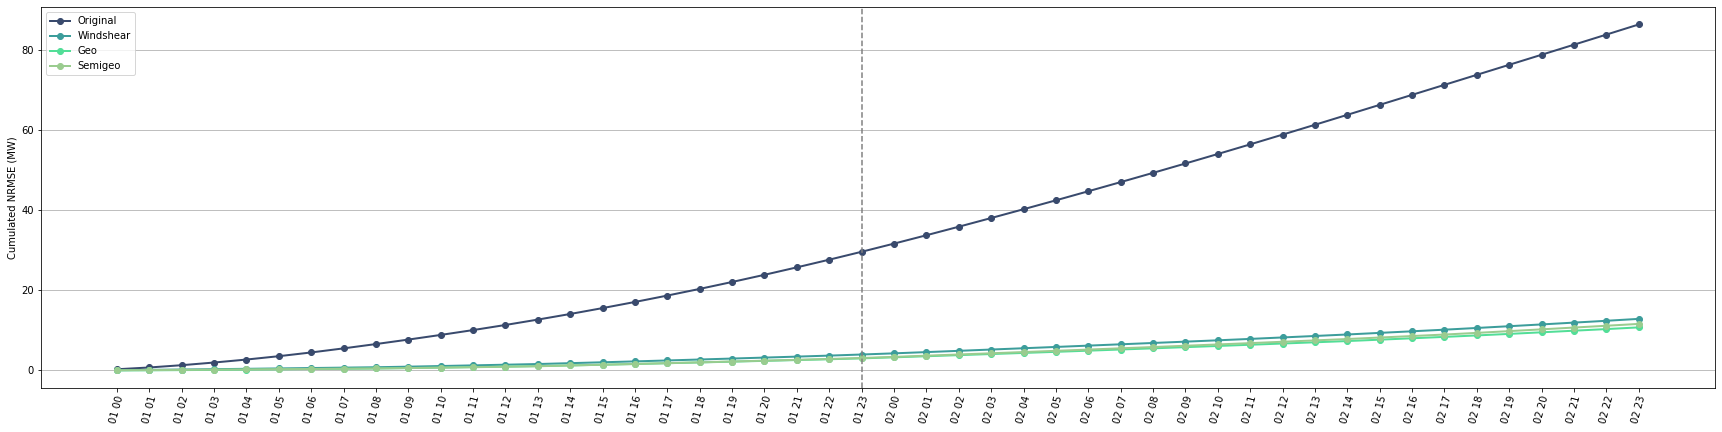

In [24]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_CUM"], "Windshear" : wsr_err["NRMSE_CUM"], "Geo" : geo_err["NRMSE_CUM"], "Semigeo" : semigeo_err["NRMSE_CUM"]}, ylabel="Cumulated NRMSE (MW)", path=plot_path+"Model_compare_CNRMSE_2d.png")

### Plot Prediction

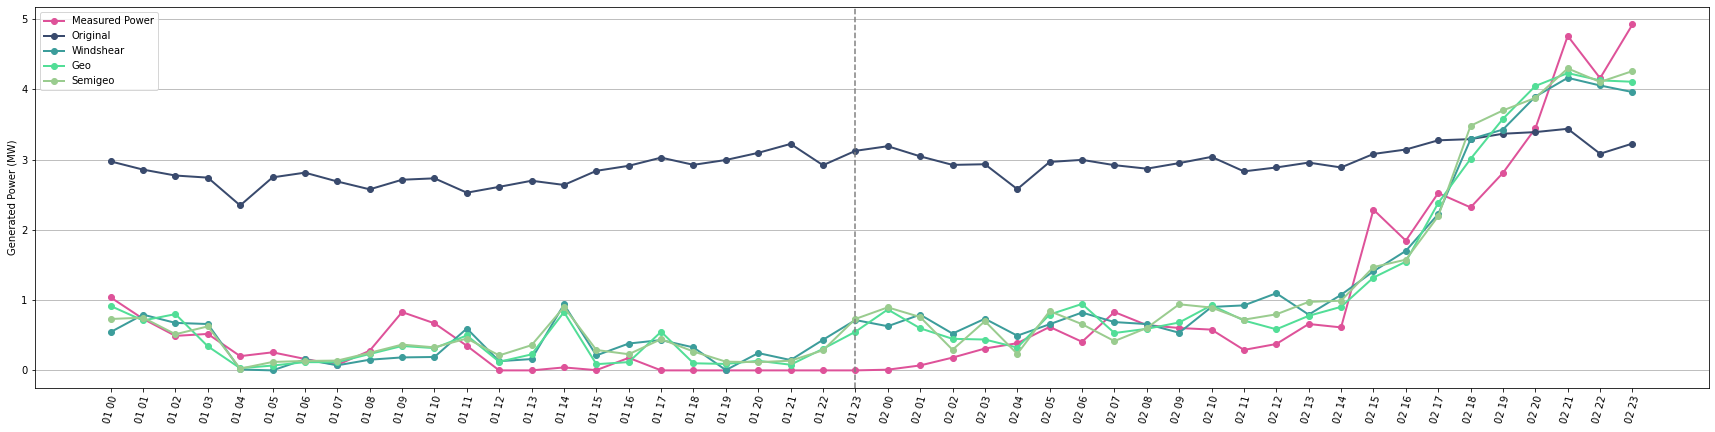

In [25]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)", path=plot_path+"Model_predict_2d.png")

## 5ds, 120hours

In [65]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-30")
df_evl_5d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [66]:
original_err = model_evaluation(df_evl_5d, org_cols, model_original, path=error_path+"original_error_5d.csv")
wsr_err = model_evaluation(df_evl_5d, wsr_cols, model_wsr, path=error_path+"wsr_error_5d.csv")
geo_err = model_evaluation(df_evl_5d, geo_cols, model_geo, path=error_path+"geo_error_5d.csv")
semigeo_err = model_evaluation(df_evl_5d, semigeo_cols, model_semigeo, path=error_path+"semigeo_error_5d.csv")

#### Model Comparement

In [67]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': 0.05, 'Windshear': 0.7, 'Geo': 0.71, 'Semigeo': 0.717}

In [68]:
print(original_err.iloc[-1]["NRMSE_CUM"])
print(wsr_err.iloc[-1]["NRMSE_CUM"])
print(geo_err.iloc[-1]["NRMSE_CUM"])
print(semigeo_err.iloc[-1]["NRMSE_CUM"])

522.4997931602423
269.69135874114033
263.3747507596185
260.71569196436934


### Plot Normalized Error

In [69]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_IDV"], "Windshear" : wsr_err["NMAE_IDV"], "Geo" : geo_err["NMAE_IDV"], "Semigeo" : semigeo_err["NMAE_IDV"]}, ylabel="NMAE (MW)", path=plot_path+"Model_compare_NMAE_5d.png")

In [70]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_IDV"], "Windshear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "Semigeo" : semigeo_err["NMSE"]}, ylabel="NMSE (MW)", path=plot_path+"Model_compare_NMSE_5d.png")

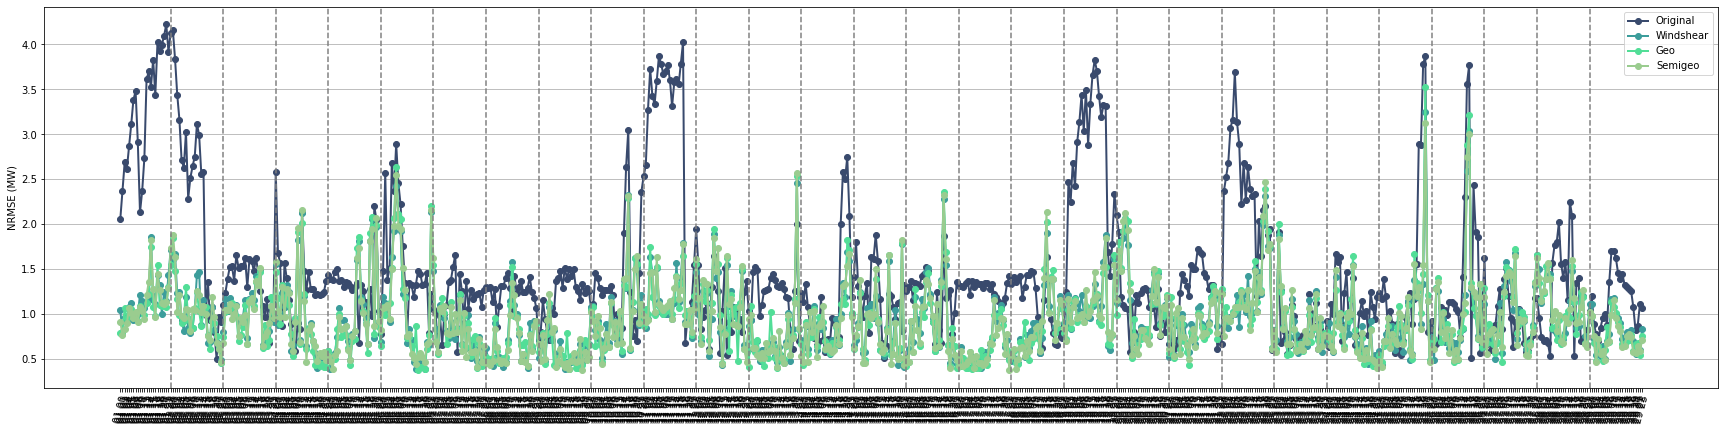

In [71]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_IDV"], "Windshear" : wsr_err["NRMSE_IDV"], "Geo" : geo_err["NRMSE_IDV"], "Semigeo" : semigeo_err["NRMSE_IDV"]}, ylabel="NRMSE (MW)", path=plot_path+"Model_compare_RNMSE_5d.png")

### Plot Cumulated Normalized Error

In [33]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_CUM"], "Windshear" : wsr_err["NMAE_CUM"], "Geo" : geo_err["NMAE_CUM"], "Semigeo" : semigeo_err["NMAE_CUM"]}, ylabel="Cumulated NMAE (MW)", path=plot_path+"Model_compare_CNMAE_5d.png")

In [34]:
# myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_CUM"], "Windshear" : wsr_err["NMSE_CUM"], "Geo" : geo_err["NMSE_CUM"], "Semigeo" : semigeo_err["NMSE_CUM"]}, ylabel="Cumulated NMSE (MW)", path=plot_path+"Model_compare_CNMSE_5d.png")

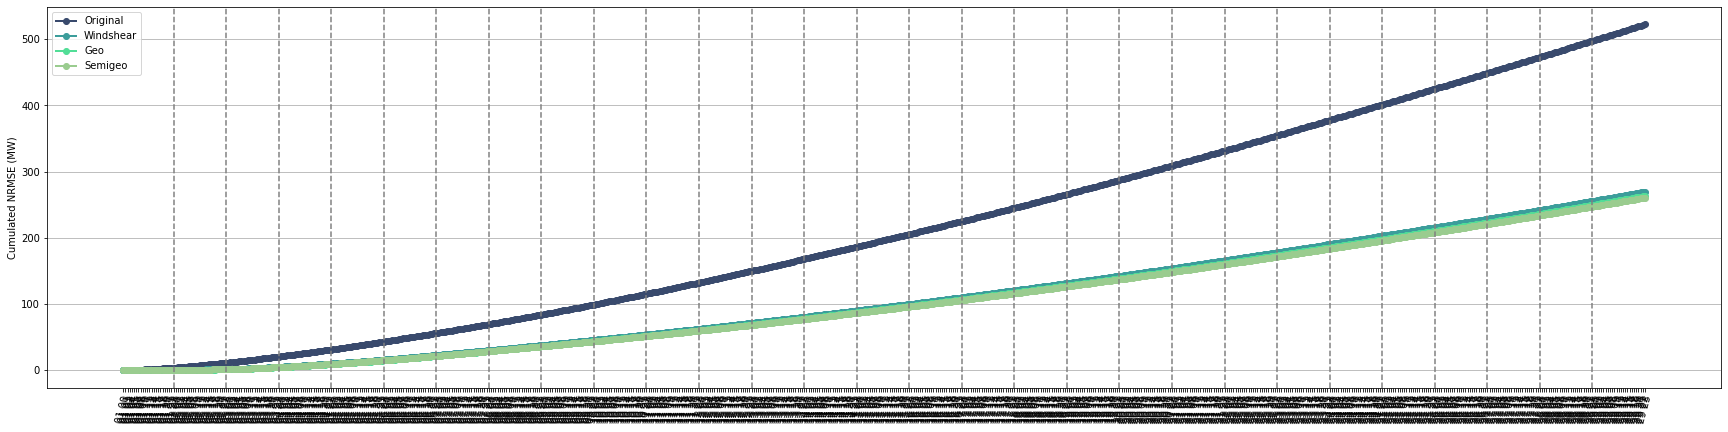

In [72]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_CUM"], "Windshear" : wsr_err["NRMSE_CUM"], "Geo" : geo_err["NRMSE_CUM"], "Semigeo" : semigeo_err["NRMSE_CUM"]}, ylabel="Cumulated NRMSE (MW)", path=plot_path+"Model_compare_CNRMSE_5d.png")

### Plot Prediction

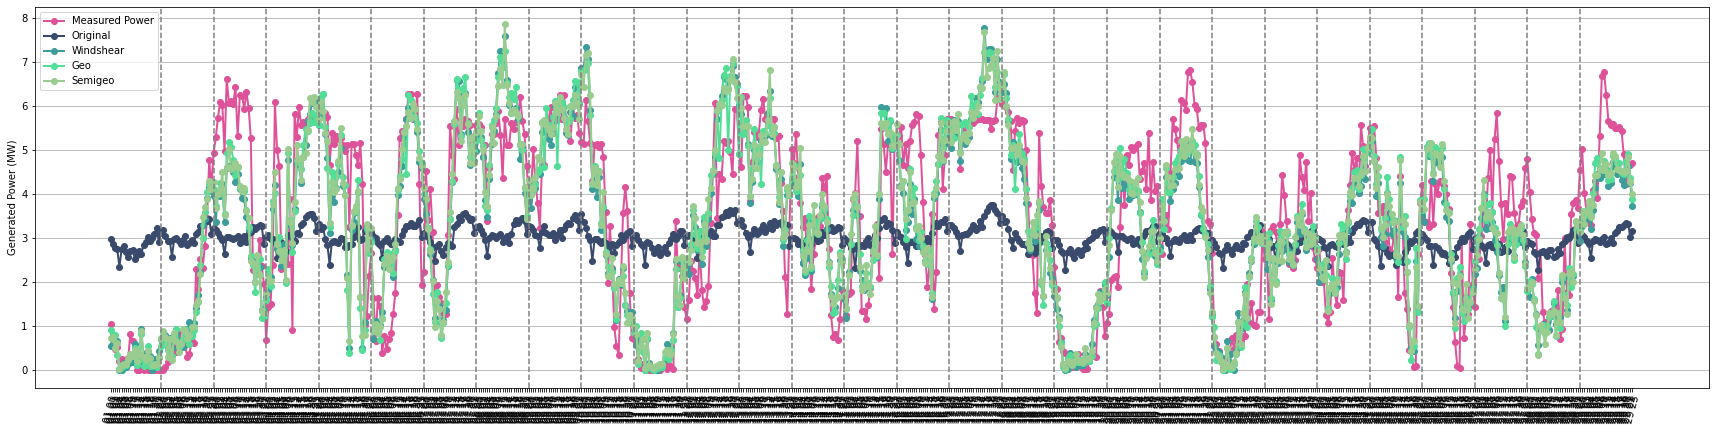

In [73]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)", path=plot_path+"Model_predict_5d.png")

### 5 days 1 hour ahead

In [37]:
original_err = model_evaluation(df_evl_5d, org_cols, model_original, ahead=1)
wsr_err = model_evaluation(df_evl_5d, wsr_cols, model_wsr, ahead=1)
geo_err = model_evaluation(df_evl_5d, geo_cols, model_geo, ahead=1)
semigeo_err = model_evaluation(df_evl_5d, semigeo_cols, model_semigeo, ahead=1)

In [60]:
from sklearn.metrics import r2_score
def model_improvement(errors:dict):
    """
    Compare the improvements of models
    """
    Imp = {x:[] for x in errors.keys()}
    r2 = {x:[] for x in errors.keys()}
    
    for ecname in errors.keys():
        df = pd.DataFrame([], columns=[x for x in errors.keys() if x != ecname])
        ecrefs = errors.copy()
        ec = ecrefs.pop(ecname)
        for ecrefname, ecref in ecrefs.items():
            I = 100 * (ecref["NRMSE"] - ec["NRMSE"]) / (ecref["NRMSE"])
            df[ecrefname] = I
            df["TIME_CET"] = ecref["TIME_CET"]
        Imp[ecname] = df
        

        r2[ecname] = round(r2_score(ec["VAERDI"], ec["pred"]), 3)
    return Imp, r2

In [61]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': 0.054, 'Windshear': 0.756, 'Geo': 0.778, 'Semigeo': 0.781}

In [62]:
print(imp["Original"].mean())
print(imp["Windshear"].mean())
print(imp["Geo"].mean())
print(imp["Semigeo"].mean())

Windshear   -299.151650
Geo         -397.156864
Semigeo     -351.256771
dtype: float64
Original    67.865765
Geo        -18.763770
Semigeo    -10.514324
dtype: float64
Original     71.026361
Windshear    12.928016
Semigeo       5.061297
dtype: float64
Original     70.209271
Windshear     8.659537
Geo          -6.485192
dtype: float64


In [63]:
imp["Semigeo"]

Original  Windshear         Geo            TIME_CET
0    84.129653  37.643417 -151.189919 2019-03-01 00:00:00
1    89.622888  41.751694  -40.092874 2019-03-01 01:00:00
2    89.384261  33.812873  -29.779980 2019-03-01 02:00:00
3    90.875418  35.913718    3.941466 2019-03-01 03:00:00
4    88.524962  24.804273  -32.231506 2019-03-01 04:00:00
..         ...        ...         ...                 ...
114  52.825906   5.571808    0.282287 2019-03-05 18:00:00
115  51.777927   5.352885    0.707038 2019-03-05 19:00:00
116  51.913017   5.409404    0.791054 2019-03-05 20:00:00
117  52.023185   5.353828    0.760368 2019-03-05 21:00:00
118  51.841537   5.210108    0.675220 2019-03-05 22:00:00

[119 rows x 4 columns]

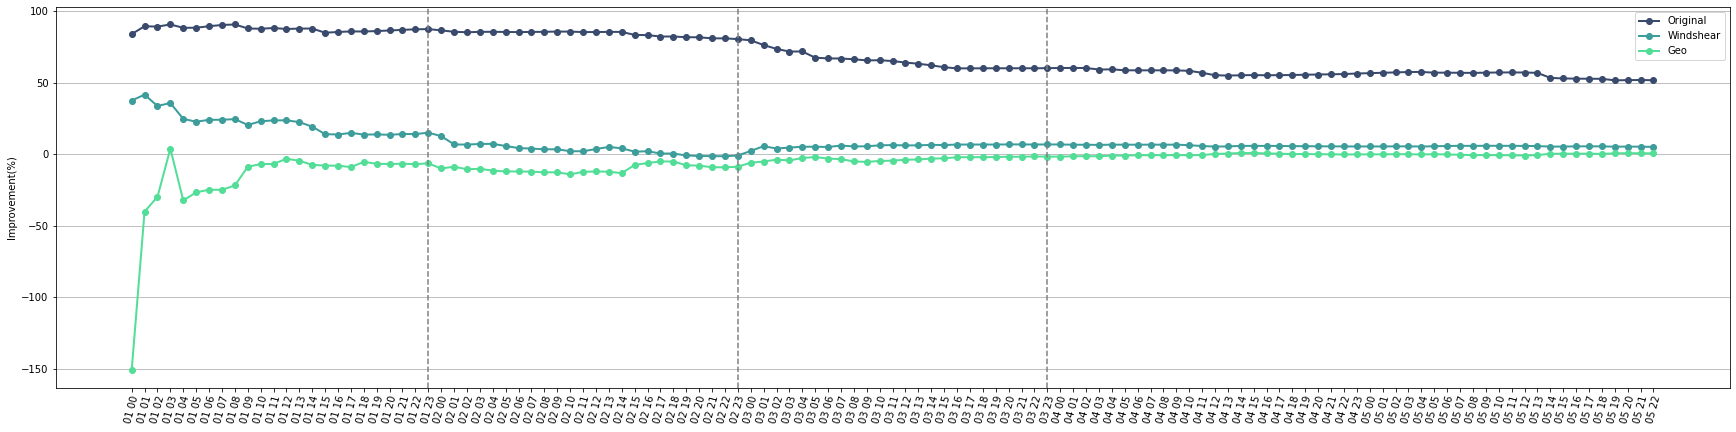

In [64]:
myplot.timelines(original_err["TIME_CET"], {"Original" : imp["Semigeo"]["Original"], "Windshear" : imp["Semigeo"]["Windshear"], "Geo" : imp["Semigeo"]["Geo"]}, ylabel="Improvement(%)")

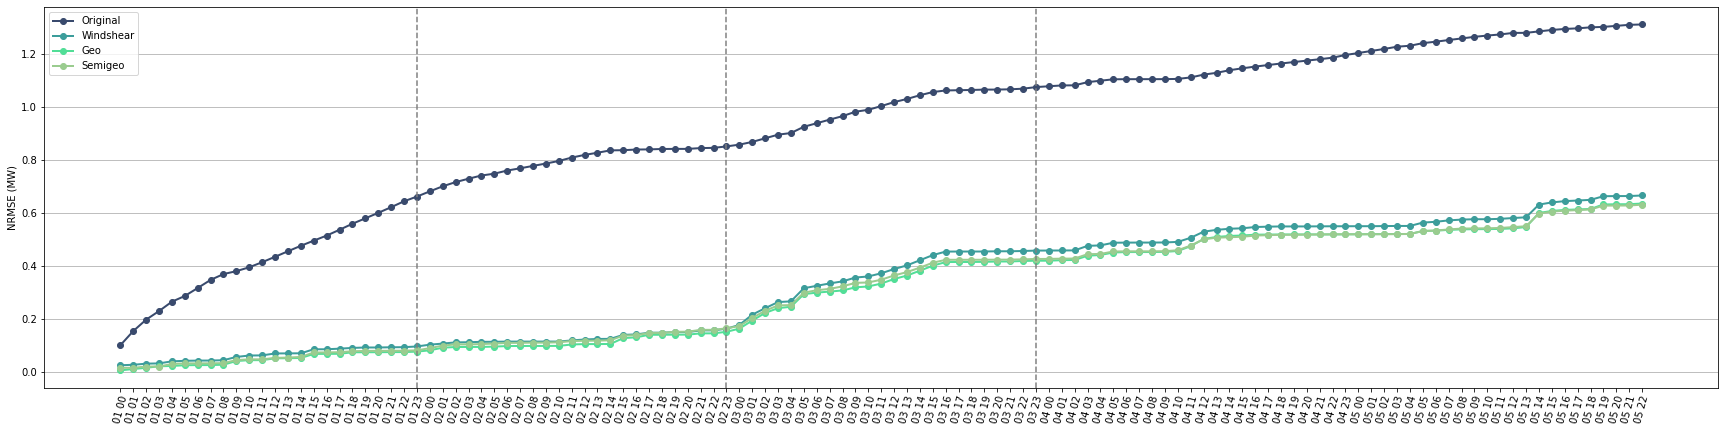

In [43]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "Windshear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "Semigeo" : semigeo_err["NRMSE"]}, ylabel="NRMSE (MW)")

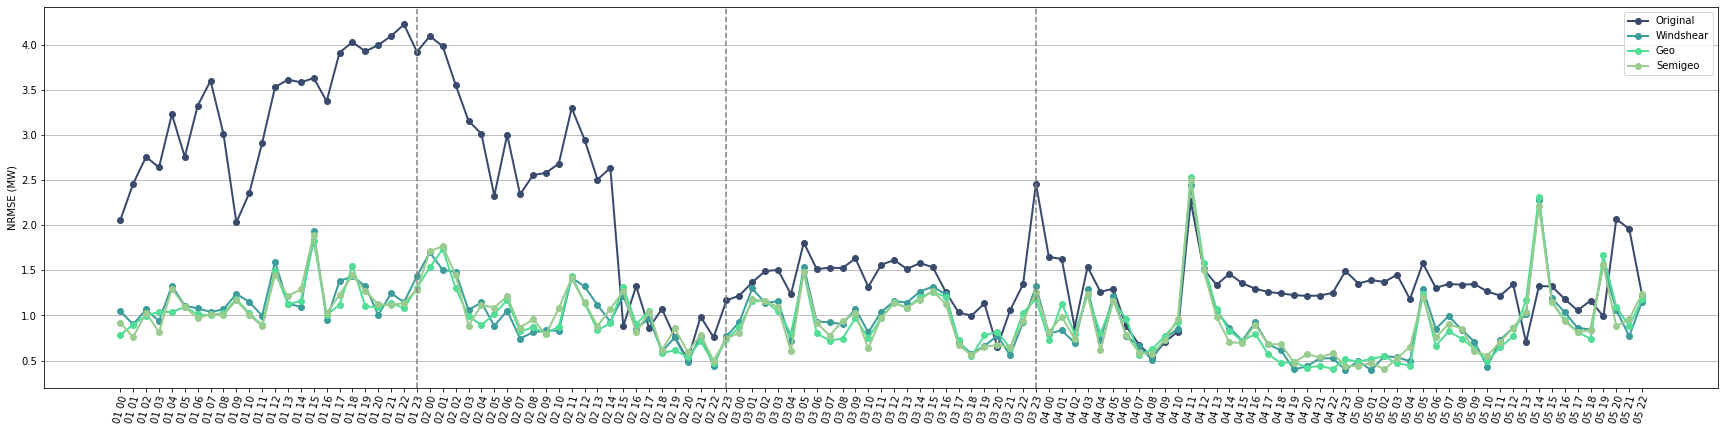

In [44]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_IDV"], "Windshear" : wsr_err["NRMSE_IDV"], "Geo" : geo_err["NRMSE_IDV"], "Semigeo" : semigeo_err["NRMSE_IDV"]}, ylabel="NRMSE (MW)")

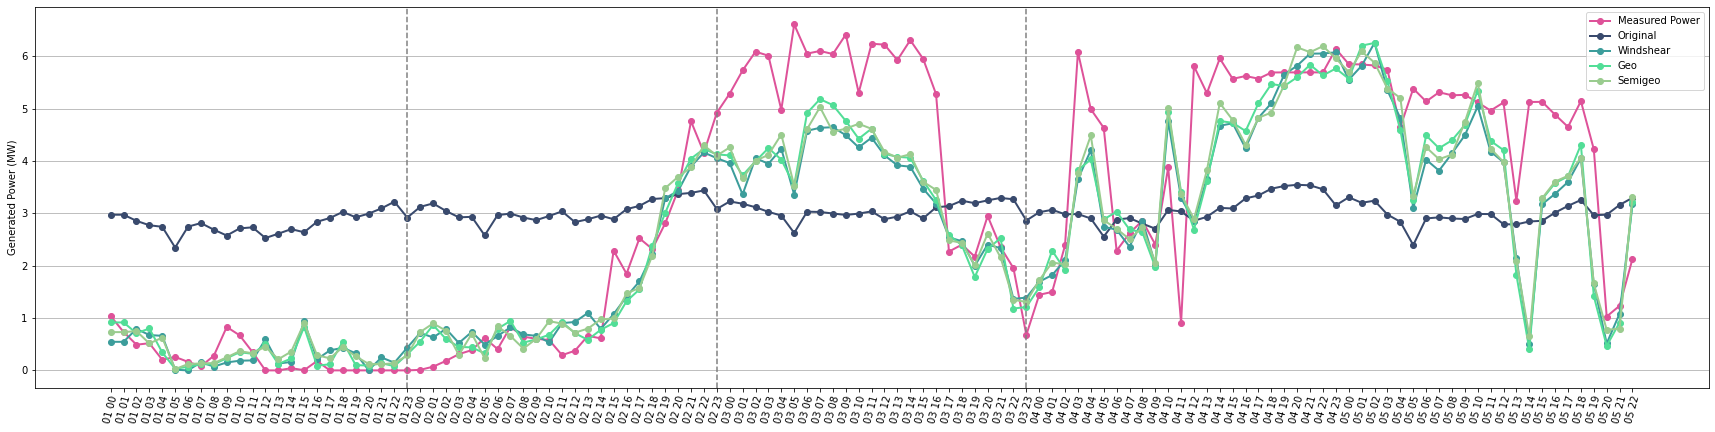

In [46]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)")